In [2]:
responses = {
      "hi": "Hello! Welcome to TechGadget Support. How can I assist you today?",
      "do you have smartwatches": "Yes, we have a variety of smartwatches. You can check them out on our products page.",
      "shipping time": "Shipping usually takes 3-5 business days.",
      "shipping methods": "We offer standard, expedited, and overnight shipping.",
      "return policy": "You can return products within 30 days of receipt for a full refund.",
      "how to return": "To return a product, please visit our returns page for a step-by-step guide.",
      "won’t turn on": "Make sure your gadget is charged. If it still won’t turn on, you can visit our troubleshooting page.",
      "reset device": "To reset your device, hold down the power button for 10 seconds. If that doesn't work, please check the manual for a factory reset.",
      "bye": "Thank you for visiting TechGadget. If you have more questions, feel free to ask. Goodbye!"
}

def get_bot_response(user_input):
      user_input = user_input.lower()

      for keyword, response in responses.items():
          if keyword in user_input:
              return response

      return "I'm not sure how to respond to that. Can you try asking something else?"

while True:
      user_input = input("You: ")
      if user_input.lower() in ["quit", "exit", "bye"]:
          print("Bot: Goodbye! If you have any more questions, we're here to help.")
          break

      response = get_bot_response(user_input)
      print(f"Bot: {response}")

Bot: I'm not sure how to respond to that. Can you try asking something else?
Bot: Hello! Welcome to TechGadget Support. How can I assist you today?
Bot: I'm not sure how to respond to that. Can you try asking something else?
Bot: I'm not sure how to respond to that. Can you try asking something else?
Bot: I'm not sure how to respond to that. Can you try asking something else?
Bot: I'm not sure how to respond to that. Can you try asking something else?
Bot: Goodbye! If you have any more questions, we're here to help.


## Part 1: Predicting Building Energy Efficiency (Supervised Learning)

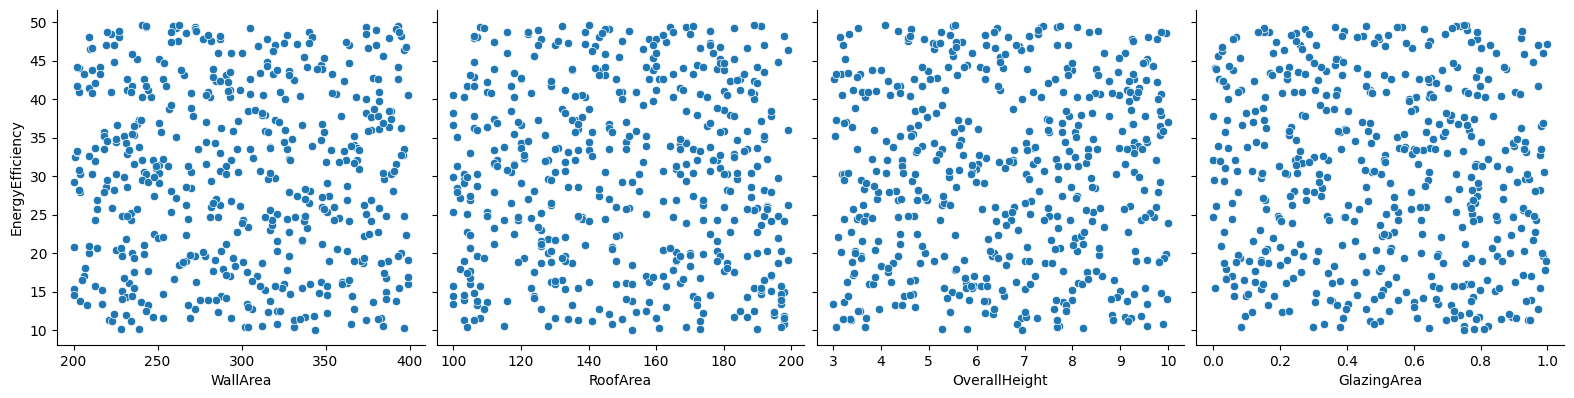

Mean Squared Error: 146.02051889440582


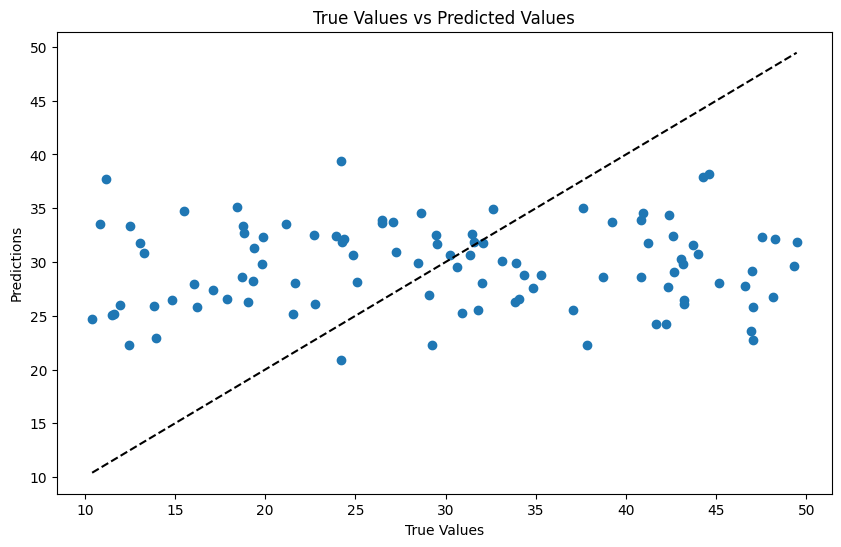

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

warnings.filterwarnings('ignore')

# Generate synthetic dataset for building features and energy efficiency ratings
np.random.seed(0)
data_size = 500
data = {
    'WallArea': np.random.randint(200, 400, data_size),
    'RoofArea': np.random.randint(100, 200, data_size),
    'OverallHeight': np.random.uniform(3, 10, data_size),
    'GlazingArea': np.random.uniform(0, 1, data_size),
    'EnergyEfficiency': np.random.uniform(10, 50, data_size)  # Energy efficiency rating
}
df = pd.DataFrame(data)

# Data preprocessing
X = df.drop('EnergyEfficiency', axis=1)
y = df['EnergyEfficiency']

# Visualize the relationships between features and the target variable (Energy Efficiency)
sns.pairplot(df, x_vars=['WallArea', 'RoofArea', 'OverallHeight', 'GlazingArea'], y_vars='EnergyEfficiency', height=4, aspect=1, kind='scatter')
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Plot the True values vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

## Part 2: Vehicle Clustering (Unsupervised Learning)

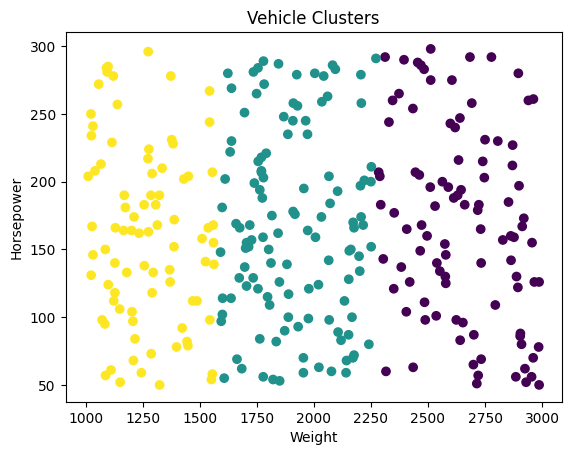

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore')

# Generate synthetic dataset for vehicles
np.random.seed(0)
data_size = 300
data = {
    'Weight': np.random.randint(1000, 3000, data_size),
    'EngineSize': np.random.uniform(1.0, 4.0, data_size),
    'Horsepower': np.random.randint(50, 300, data_size)
}
df = pd.DataFrame(data)

# No labels are needed for unsupervised learning
X = df

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Plotting the clusters
plt.scatter(df['Weight'], df['Horsepower'], c=kmeans.labels_)
plt.xlabel('Weight')
plt.ylabel('Horsepower')
plt.title('Vehicle Clusters')
plt.show()

Model Accuracy: 1.0


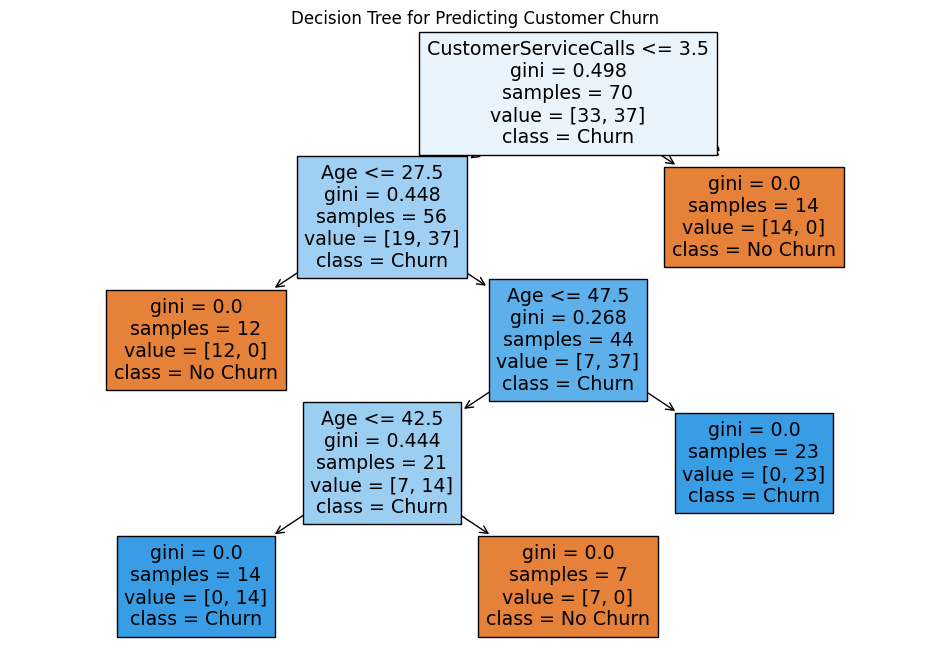

In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

warnings.filterwarnings('ignore')

# Creating a synthetic dataset
# This dataset simulates customer data for a telecom company
data = {
      'CustomerID': range(1, 101),  # Unique ID for each customer
      'Age': [20, 25, 30, 35, 40, 45, 50, 55, 60, 65]*10,  # Age of customers
      'MonthlyCharge': [50, 60, 70, 80, 90, 100, 110, 120, 130, 140]*10,  # Monthly bill amount
      'CustomerServiceCalls': [1, 2, 3, 4, 0, 1, 2, 3, 4, 0]*10,  # Number of customer service calls
      'Churn': ['No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes']*10  # Churn status
}
df = pd.DataFrame(data)

# Splitting the dataset into features and target variable
# Features include age, monthly charge, and customer service calls
# The target variable is churn (Yes or No)
X = df[['Age', 'MonthlyCharge', 'CustomerServiceCalls']]
y = df['Churn']

# Splitting the dataset into training and testing sets
# 70% of the data is used for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the Decision Tree model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(X_test)

# Evaluating the model using accuracy
# Accuracy is the proportion of correct predictions among the total number of cases processed
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy}')

# Visualizing the decision tree
# This visualization helps in understanding how the model makes decisions
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True, feature_names=['Age', 'MonthlyCharge', 'CustomerServiceCalls'], class_names=['No Churn', 'Churn'])
plt.title('Decision Tree for Predicting Customer Churn')
plt.show()

In [7]:
# Idenfity the foundation model to fine-tune
model_id = "huggingface-llm-falcon-7b-bf16"

# The training data of SEC filing of Amazon has been pre-saved in the S3 bucket.
from sagemaker.jumpstart.utils import get_jumpstart_content_bucket

# Sample training data is available in this bucket
data_bucket = get_jumpstart_content_bucket(aws_region)
data_prefix = "training-datasets/sec_data"

training_dataset_s3_path = f"s3://{data_bucket}/{data_prefix}/train/"
validation_dataset_s3_path = f"s3://{data_bucket}/{data_prefix}/validation/"

#Prepare training parameters
from sagemaker import hyperparameters

my_hyperparameters = hyperparameters.retrieve_default(
    model_id=model_id, model_version=model_version
)

my_hyperparameters["epoch"] = "3"
my_hyperparameters["per_device_train_batch_size"] = "2"
my_hyperparameters["instruction_tuned"] = "False"
print(my_hyperparameters)
#Validate hyperparameters

hyperparameters.validate(
    model_id=model_id, model_version=model_version, hyperparameters=my_hyperparameters
)
# Starting training
from sagemaker.jumpstart.estimator import JumpStartEstimator

domain_adaptation_estimator = JumpStartEstimator(
    model_id=model_id,
    hyperparameters=my_hyperparameters,
    instance_type="ml.p3dn.24xlarge",
)
domain_adaptation_estimator.fit(
    {"train": training_dataset_s3_path, "validation": validation_dataset_s3_path}, logs=True
)
#Extract Training performance metrics. Performance metrics such as training loss and validation accuracy/loss can be accessed through cloudwatch while the training. We can also fetch these metrics and analyze them within the notebook

from sagemaker import TrainingJobAnalytics

training_job_name = domain_adaptation_estimator.latest_training_job.job_name

df = TrainingJobAnalytics(training_job_name=training_job_name).dataframe()
df.head(10)
# Deploying inference endpoints
# We deploy the domain-adaptation fine-tuned and pretrained models separately, and compare their performances.
# We first deploy the domain-adaptation fine-tuned model.

domain_adaptation_predictor = domain_adaptation_estimator.deploy()
#Next, we deploy the pre-trained huggingface-llm-falcon-7b-bf16.

my_model = JumpStartModel(model_id=model_id)
pretrained_predictor = my_model.deploy()

# Running inference queries and compare model performances
parameters = {
    "max_new_tokens": 300,
    "top_k": 50,
    "top_p": 0.8,
    "do_sample": True,
    "temperature": 1,
}


def generate_response(endpoint_name, text):
    payload = {"inputs": f"{text}:", "parameters": parameters}
    query_response = query_endpoint_with_json_payload(
        json.dumps(payload).encode("utf-8"), endpoint_name=endpoint_name
    )
    generated_texts = parse_response(query_response)
    print(f"Response: {generated_texts}{newline}")
test_paragraph_domain_adaption = [
    "This Form 10-K report shows that",
    "We serve consumers through",
    "Our vision is",
]


for paragraph in test_paragraph_domain_adaption:
    print("-" * 80)
    print(paragraph)
    print("-" * 80)
    print(f"{bold}pre-trained{unbold}")
    generate_response(pretrained_predictor.endpoint_name, paragraph)
    print(f"{bold}fine-tuned{unbold}")
    generate_response(domain_adaptation_predictor.endpoint_name, paragraph)

# The fine-tuned model starts to generate responses that are more specific to the domain of fine-tuning data which is relating to SEC report of Amazon.

# Clean up the endpoint
# Delete the SageMaker endpoint
pretrained_predictor.delete_model()
pretrained_predictor.delete_endpoint()
domain_adaptation_predictor.delete_model()
domain_adaptation_predictor.delete_endpoint()

ModuleNotFoundError: No module named 'sagemaker'